In [59]:
import numpy as np
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

# Set random seed for reproducibility
#np.random.seed(42)

# Parameters
n_points = 1000            # Number of discrete time steps
n_directions = 50         # Number of projection directions (samples on S^1)
eta = 0.05                # Learning rate
n_iterations = 200        # Gradient descent steps

# Sample time domain
t = np.linspace(0, 1, n_points)


# Setup: parameters for Hilbert curve
p = 10  # number of iterations (2^p points per axis)
n = 2   # dimension
hilbert_curve = HilbertCurve(p, n)

# Function mapping t in [0,1] to (x,y) in [0,1]^2 using Hilbert curve
def h(t):
    """
    Map scalar t in [0,1] to 2D point using normalized Hilbert curve.
    Supports both scalar and array inputs.
    """
    t = np.atleast_1d(t)
    max_hindex = 2**(p * n) - 1
    h_indices = np.clip((t * max_hindex).astype(int), 0, max_hindex)
    coords = np.array([hilbert_curve.point_from_distance(idx) for idx in h_indices])
    coords_normalized = coords / (2**p - 1)
    return coords_normalized

# Initialize g randomly in [0,1]^2
g = np.random.uniform(0.4, 0.6, size=(n_points, 2))


# Evaluate h
h_vals = h(t)

# Sample projection directions on the unit circle
angles = np.linspace(0, np.pi, n_directions)
theta = np.stack([np.cos(angles), np.sin(angles)], axis=1)  # Shape: (n_directions, 2)

# Gradient descent optimization loop
for step in range(n_iterations):
    grad = np.zeros_like(g)

    for th in theta:
        # Project both curves
        g_proj = g @ th        # shape (n_points,)
        h_proj = h_vals @ th
        #print(g_proj.shape, h_proj.shape)
        # Sort projections
        g_sorted_idx = np.argsort(g_proj)
        h_sorted = np.sort(h_proj)

        # Match sorted projections
        g_sorted = g_proj[g_sorted_idx]
        error = g_sorted - h_sorted

        # Compute gradient in projected direction
        # Grad is only applied to the sorted indices
        for i, idx in enumerate(g_sorted_idx):
            grad[idx] += 2 * error[i] * th / n_directions

    # Gradient step
    g -= eta * grad

# Plot final result
plt.figure(figsize=(6, 6))
plt.plot(h_vals[:, 0], h_vals[:, 1], label='Target curve h', lw=2)
plt.plot(g[:, 0], g[:, 1], label='Optimized curve g', lw=2)
plt.legend()
plt.axis('equal')
plt.title("Optimizing g to match h using Sliced Wasserstein-1")
plt.show()


KeyboardInterrupt: 

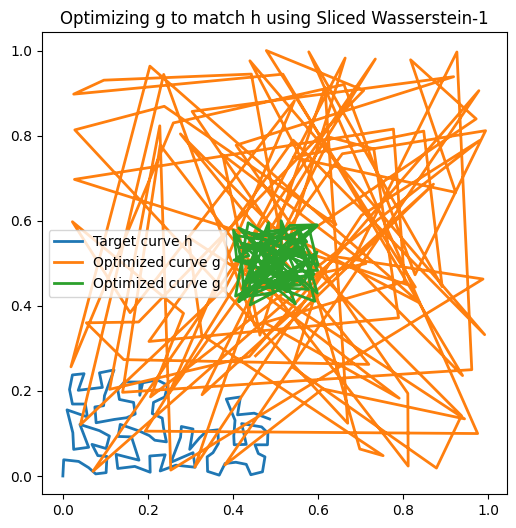

In [ ]:
# Plot final result
idx = 100
g_test = np.random.uniform(0.4, 0.6, size=(n_points, 2))


plt.figure(figsize=(6, 6))
plt.plot(h_vals[:idx, 0], h_vals[:idx, 1], label='Target curve h', lw=2)
plt.plot(g[:idx, 0], g[:idx, 1], label='Optimized curve g', lw=2)
plt.plot(g_test[:idx, 0], g_test[:idx, 1], label='Optimized curve g', lw=2)
plt.legend()
plt.axis('equal')
plt.title("Optimizing g to match h using Sliced Wasserstein-1")
plt.show()

tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan, nan])
tensor([nan,

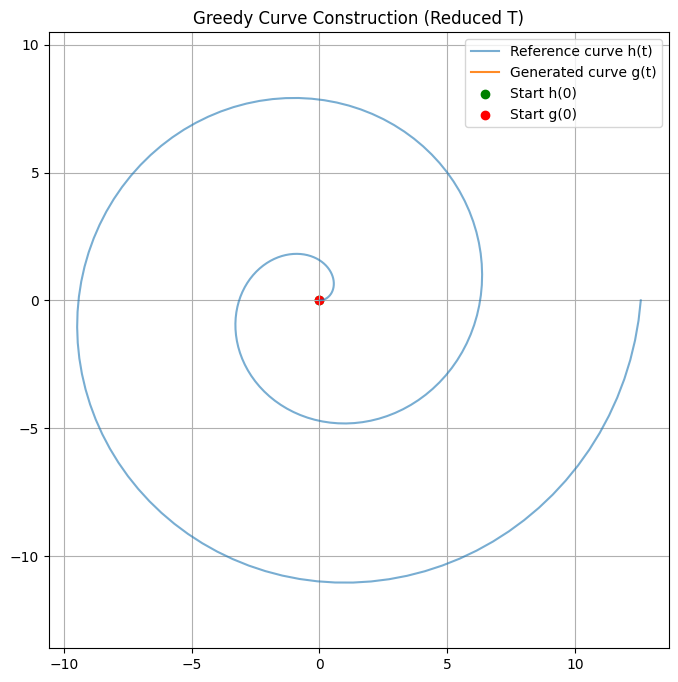

In [ ]:
import torch
import matplotlib.pyplot as plt

# Reduce number of time steps for memory efficiency
T = 200
step_size = 0.05

# Generate a reference spiral curve h: [0,1] -> R^2
t_vals = torch.linspace(0, 4 * torch.pi, T)
h_x = t_vals * torch.cos(t_vals)
h_y = t_vals * torch.sin(t_vals)
h_points = torch.stack([h_x, h_y], dim=1)

# Initialize g curve
g_points = torch.zeros((T, 2))
g_points[0] = torch.tensor([0.0, 0.0])

# Track used reference points
used_mask = torch.zeros(T, dtype=torch.bool)

# Greedy direction update function
def next_direction(g, h_points, used_mask):
    diffs = h_points - g
    dists = torch.norm(diffs, dim=1)
    dists[used_mask] = float('inf')  # mask out used targets
    idx = torch.argmin(dists)
    direction = diffs[idx] / torch.norm(diffs[idx])
    return direction, idx

# Generate g curve
for i in range(T - 1):
    direction, idx = next_direction(g_points[i], h_points, used_mask)
    print(direction)
    g_points[i + 1] = g_points[i] + step_size * direction
    used_mask[idx] = True

# Plot the reference and generated curves
plt.figure(figsize=(8, 8))
plt.plot(h_points[:, 0], h_points[:, 1], label='Reference curve h(t)', alpha=0.6)
plt.plot(g_points[:, 0], g_points[:, 1], label='Generated curve g(t)', alpha=0.9)
plt.scatter(h_points[0, 0], h_points[0, 1], c='green', label='Start h(0)')
plt.scatter(g_points[0, 0], g_points[0, 1], c='red', label='Start g(0)')
plt.legend()
plt.axis('equal')
plt.title("Greedy Curve Construction (Reduced T)")
plt.grid(True)
plt.show()


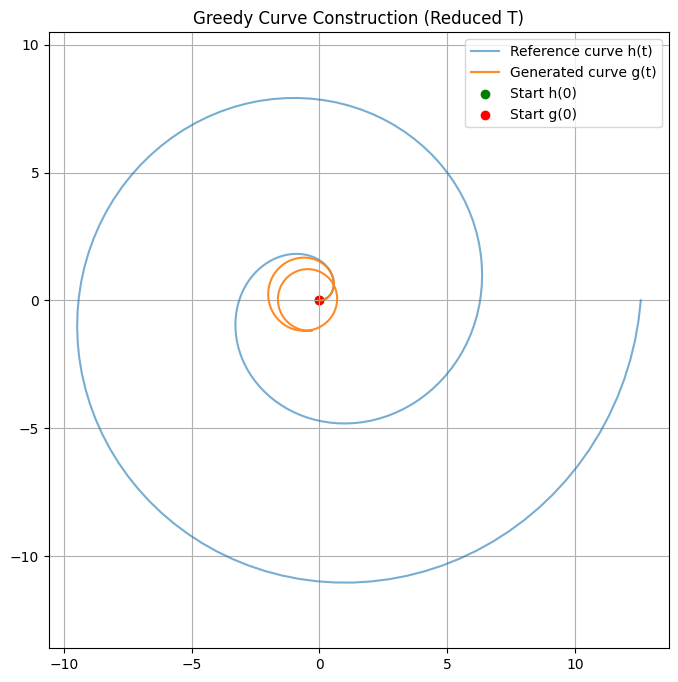

In [ ]:
# Re-run the numerical computation only (no plotting)
num_steps = 300
step_size = 0.05
t_vals = np.linspace(0, 4 * np.pi, num_steps)

# Define h(t) as a spiral in 2D
h_curve = np.stack([t_vals * np.cos(t_vals), t_vals * np.sin(t_vals)], axis=1)

# Initialize g(t)
g_curve = np.zeros((num_steps, 2))
g_curve[0] = np.array([0.0, 0.0])

# Keep track of which h points have been used
used = np.zeros(num_steps, dtype=bool)

for i in range(1, num_steps):
    current_pos = g_curve[i - 1]
    
    # Mask unused h points
    available_h = h_curve[~used]
    
    # Compute distances to current g position
    dists = np.linalg.norm(available_h - current_pos, axis=1)
    min_idx_local = np.argmin(dists)
    
    # Get index in the original h_curve
    global_indices = np.where(~used)[0]
    min_idx = global_indices[min_idx_local]
    
    # Update used mask
    used[min_idx] = True
    
    # Move a step in the direction of the closest h point
    direction = h_curve[min_idx] - current_pos
    norm = np.linalg.norm(direction)
    if norm != 0:
        direction /= norm
    g_curve[i] = current_pos + step_size * direction

# Return the last few values of g_curve for inspection
g_curve[-5:]

# Plot the reference and generated curves
plt.figure(figsize=(8, 8))
plt.plot(h_points[:, 0], h_points[:, 1], label='Reference curve h(t)', alpha=0.6)
plt.plot(g_curve[:, 0], g_curve[:, 1], label='Generated curve g(t)', alpha=0.9)
plt.scatter(h_points[0, 0], h_points[0, 1], c='green', label='Start h(0)')
plt.scatter(g_points[0, 0], g_points[0, 1], c='red', label='Start g(0)')
plt.legend()
plt.axis('equal')
plt.title("Greedy Curve Construction (Reduced T)")
plt.grid(True)
plt.show()


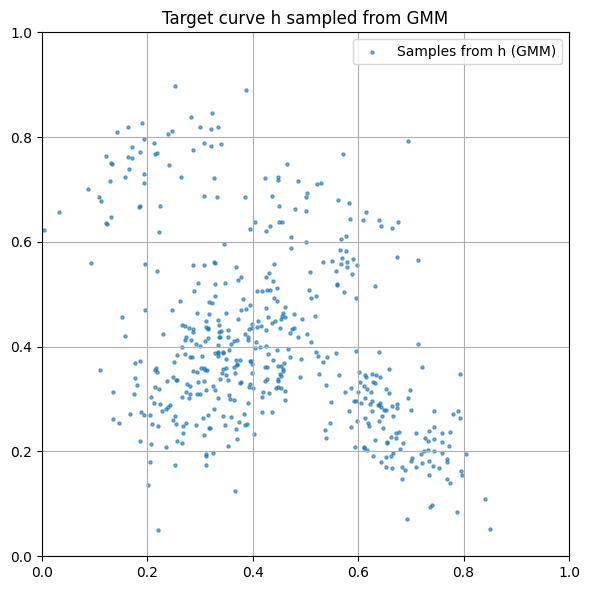

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

# Define the GMM parameters
mean1 = np.array([0.35, 0.38])
cov1 = np.array([[0.01, 0.004], [0.004, 0.01]])
w1 = 0.6

mean2 = np.array([0.68, 0.25])
cov2 = np.array([[0.005, -0.003], [-0.003, 0.005]])
w2 = 0.2

mean3 = np.array([0.56, 0.64])
cov3 = np.array([[0.008, 0.0], [0.0, 0.004]])
w3 = 0.1

mean4 = np.array([0.22, 0.74])
cov4 = np.array([[0.01, 0.004], [0.004, 0.01]])
w4 = 0.1

# PDF function from the GMM
def pdf(x):
    return (w1 * mvn.pdf(x, mean1, cov1) +
            w2 * mvn.pdf(x, mean2, cov2) +
            w3 * mvn.pdf(x, mean3, cov3) +
            w4 * mvn.pdf(x, mean4, cov4))

# Sample from the GMM
def sample_gmm(n_samples):
    weights = [w1, w2, w3, w4]
    means = [mean1, mean2, mean3, mean4]
    covs = [cov1, cov2, cov3, cov4]
    
    components = np.random.choice(len(weights), size=n_samples, p=weights)
    samples = np.array([np.random.multivariate_normal(means[i], covs[i]) for i in components])
    return samples

# Generate the target curve h by sampling from the GMM
n_samples = 500
h_points = sample_gmm(n_samples)

# Plot the target distribution
plt.figure(figsize=(6, 6))
plt.scatter(h_points[:, 0], h_points[:, 1], s=5, alpha=0.6, label='Samples from h (GMM)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Target curve h sampled from GMM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

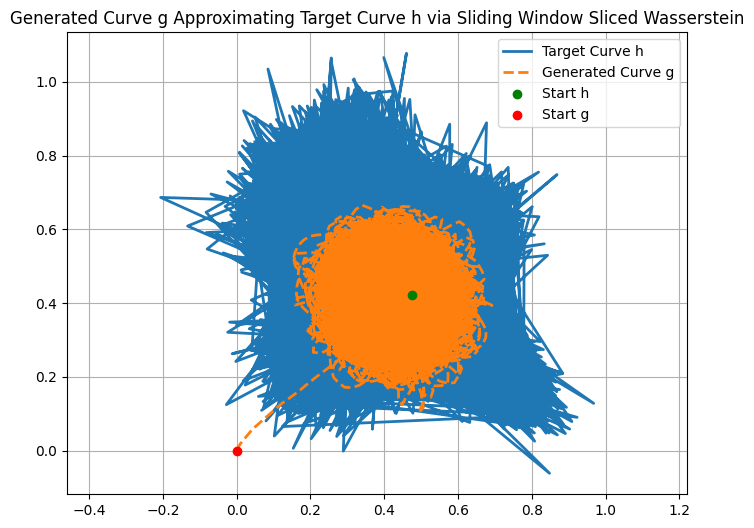

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sliced_wasserstein_direction(g_window, h_window, num_projections=10):
    """
    Estimate gradient direction using sliced Wasserstein between g_window and h_window.
    """
    d = g_window.shape[1]
    thetas = np.random.randn(num_projections, d)
    thetas /= np.linalg.norm(thetas, axis=1, keepdims=True)

    total_direction = np.zeros(d)
    for theta in thetas:
        proj_g = g_window @ theta
        proj_h = h_window @ theta

        sorted_g_idx = np.argsort(proj_g)
        sorted_h_idx = np.argsort(proj_h)

        sorted_g = g_window[sorted_g_idx]
        sorted_h = h_window[sorted_h_idx]

        diffs = sorted_h - sorted_g
        mean_diff = np.mean(diffs, axis=0)
        total_direction += mean_diff

    direction = total_direction / num_projections
    return direction / np.linalg.norm(direction)


# Parameters
T = 20000
window_size = 20
step_size = 0.02

# Define target curve h: a spiral
theta = np.linspace(0, 4 * np.pi, T)

h_points = sample_gmm(T)

# Initialize g curve
g_points = np.zeros((T, 2))
g_points[0] = np.array([0.0, 0.0])  # Start at origin

# Generate g using sliced Wasserstein sliding window
for t in range(1, T):
    start_idx = max(0, t - window_size)
    g_window = g_points[start_idx:t]
    h_window = h_points[start_idx:t]
    if len(g_window) > 1:
        direction = sliced_wasserstein_direction(g_window, h_window)
    else:
        direction = h_points[t] - g_points[t - 1]
        direction /= np.linalg.norm(direction)
    g_points[t] = g_points[t - 1] + step_size * direction

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(h_points[:, 0], h_points[:, 1], label='Target Curve h', linewidth=2)
plt.plot(g_points[:, 0], g_points[:, 1], label='Generated Curve g', linestyle='--', linewidth=2)
plt.scatter(h_points[0, 0], h_points[0, 1], c='green', label='Start h', zorder=5)
plt.scatter(g_points[0, 0], g_points[0, 1], c='red', label='Start g', zorder=5)
plt.legend()
plt.axis('equal')
plt.title("Generated Curve g Approximating Target Curve h via Sliding Window Sliced Wasserstein")
plt.grid(True)
plt.show()


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


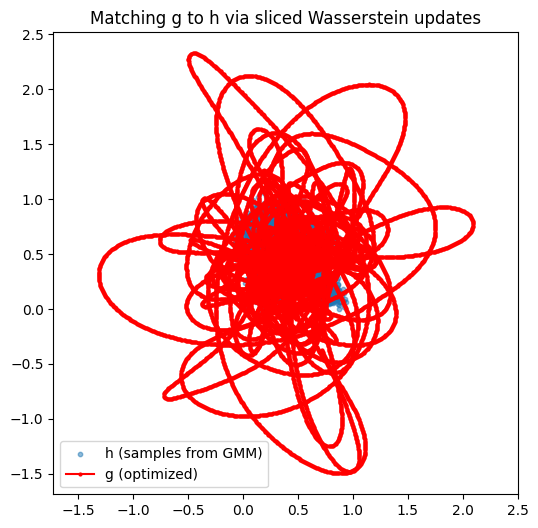

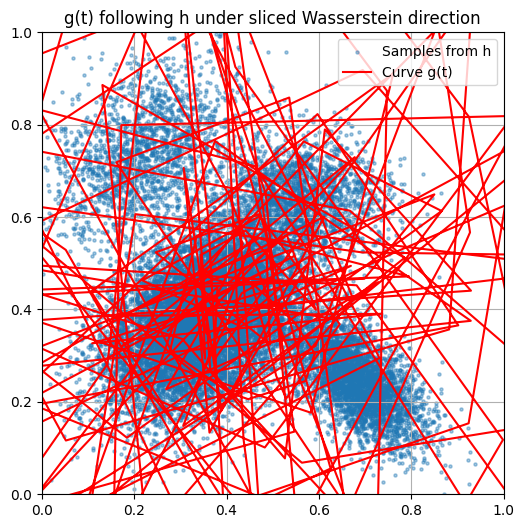

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

# Define the GMM
means = [
    np.array([0.35, 0.38]),
    np.array([0.68, 0.25]),
    np.array([0.56, 0.64]),
    np.array([0.22, 0.74]),
]
covs = [
    np.array([[0.01, 0.004], [0.004, 0.01]]),
    np.array([[0.005, -0.003], [-0.003, 0.005]]),
    np.array([[0.008, 0.0], [0.0, 0.004]]),
    np.array([[0.01, 0.004], [0.004, 0.01]]),
]
weights = [0.6, 0.2, 0.1, 0.1]

def sample_from_gmm():
    idx = np.random.choice(len(weights), p=weights)
    return np.random.multivariate_normal(means[idx], covs[idx])

# Project points x onto direction theta
def project(x, theta):
    return x @ theta  # shape (N,)

# Parameters
T = 20000  # total time steps
K = 10   # number of projection directions
step_size = 0.01
window = 5000

# Random projection directions on unit circle
thetas = np.random.randn(K, 2)
thetas /= np.linalg.norm(thetas, axis=1, keepdims=True)  # shape (K, 2)

# Initialization
g_points = [np.array([0.0, 0.0])]
h_points = []

# Run optimization
for t in range(1, T):
    if t % 1000 == 0:
        print(t)
    ht = sample_from_gmm()
    h_points.append(ht)

    if len(g_points) < len(h_points):
        g_points.append(g_points[-1])  # copy last g to match length

    # Sliding window
    g_window = np.array(g_points[-window:])
    h_window = np.array(h_points[-window:])

    total_direction = np.zeros(2)

    for theta in thetas:
        proj_g = np.sort(project(g_window, theta))
        proj_h = np.sort(project(h_window, theta))

        N = min(len(proj_g), len(proj_h))
        offset = np.mean(proj_h[:N] - proj_g[:N])  # scalar
        direction = theta * offset
        total_direction += direction

    total_direction /= K
    total_direction /= np.linalg.norm(total_direction) + 1e-8

    new_g = g_points[-1] + step_size * total_direction
    g_points[-1] = new_g  # update last g point

# Convert to arrays
g_points = np.array(g_points)
h_points = np.array(h_points)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(h_points[:, 0], h_points[:, 1], s=10, alpha=0.5, label="h (samples from GMM)")
plt.plot(g_points[:, 0], g_points[:, 1], '-o', color='red', markersize=2, label="g (optimized)")
plt.legend()
plt.axis('equal')
plt.title("Matching g to h via sliced Wasserstein updates")
plt.show()

# Convert to arrays
g_arr = np.array(g_points)
h_arr = np.array(h_points)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(h_arr[:, 0], h_arr[:, 1], alpha=0.4, label='Samples from h', s=5)
plt.plot(g_arr[::100, 0], g_arr[::100, 1], color='red', label='Curve g(t)')
plt.legend()
plt.title('g(t) following h under sliced Wasserstein direction')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


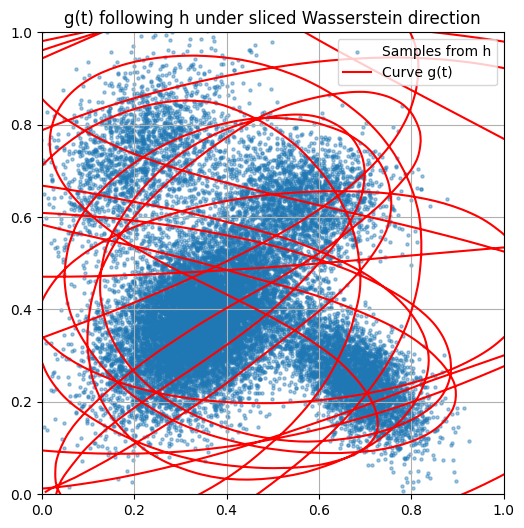

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(h_arr[:, 0], h_arr[:, 1], alpha=0.4, label='Samples from h', s=5)
plt.plot(g_arr[:, 0], g_arr[:, 1], color='red', label='Curve g(t)')
plt.legend()
plt.title('g(t) following h under sliced Wasserstein direction')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

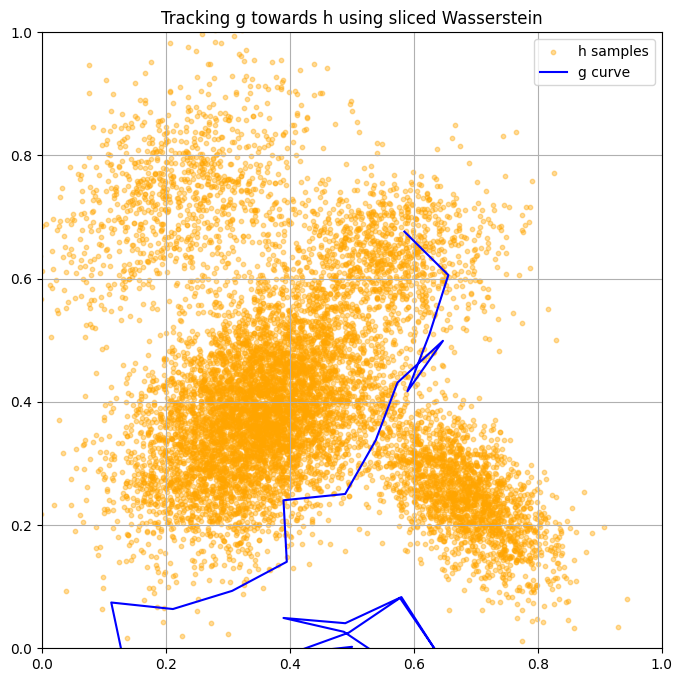

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# ======= 1. Define the target PDF for h =======

mean1 = np.array([0.35, 0.38])
cov1 = np.array([[0.01, 0.004], [0.004, 0.01]])
w1 = 0.6

mean2 = np.array([0.68, 0.25])
cov2 = np.array([[0.005, -0.003], [-0.003, 0.005]])
w2 = 0.2

mean3 = np.array([0.56, 0.64])
cov3 = np.array([[0.008, 0.0], [0.0, 0.004]])
w3 = 0.1

mean4 = np.array([0.22, 0.74])
cov4 = np.array([[0.01, 0.004], [0.004, 0.01]])
w4 = 0.1

def pdf(x):
    return (
        w1 * multivariate_normal.pdf(x, mean1, cov1)
        + w2 * multivariate_normal.pdf(x, mean2, cov2)
        + w3 * multivariate_normal.pdf(x, mean3, cov3)
        + w4 * multivariate_normal.pdf(x, mean4, cov4)
    )

def sample_h():
    r = np.random.rand()
    if r < w1:
        return np.random.multivariate_normal(mean1, cov1)
    elif r < w1 + w2:
        return np.random.multivariate_normal(mean2, cov2)
    elif r < w1 + w2 + w3:
        return np.random.multivariate_normal(mean3, cov3)
    else:
        return np.random.multivariate_normal(mean4, cov4)

# ======= 2. Define SimpleSketch class =======

class SimpleSketch:
    def __init__(self, K, n_bins=100):
        self.K = K
        self.n_bins = n_bins
        self.histograms = [np.zeros(n_bins) for _ in range(K)]
        self.projections = [self._random_theta() for _ in range(K)]
        self.range = (-1.5, 1.5)
        self.bin_edges = np.linspace(*self.range, num=n_bins + 1)

    def _random_theta(self):
        theta = np.random.randn(2)
        return theta / np.linalg.norm(theta)

    def update(self, x):
        for i in range(self.K):
            proj = np.dot(x, self.projections[i])
            bin_idx = np.searchsorted(self.bin_edges, proj) - 1
            if 0 <= bin_idx < self.n_bins:
                self.histograms[i][bin_idx] += 1

    def normalize(self):
        for i in range(self.K):
            total = np.sum(self.histograms[i])
            if total > 0:
                self.histograms[i] /= total

    def sliced_wasserstein_distance(self, other):
        total = 0.0
        for i in range(self.K):
            a = np.cumsum(self.histograms[i])
            b = np.cumsum(other.histograms[i])
            total += np.mean(np.abs(a - b))
        return total / self.K

    def sliced_wasserstein_gradient(self, x):
        grad = np.zeros_like(x)
        for i in range(self.K):
            theta = self.projections[i]
            proj = np.dot(x, theta)
            bin_idx = np.searchsorted(self.bin_edges, proj) - 1
            if 0 <= bin_idx < self.n_bins:
                diff = self.histograms[i][bin_idx]
                grad += theta * diff
        return grad / self.K

# ======= 3. Main loop: simulate g tracking h =======

T = 10000
K = 50
step_size = 0.1

g = np.zeros((T, 2))
g[0] = np.random.rand(2)

g_sketch = SimpleSketch(K)
h_sketch = SimpleSketch(K)

for t in range(1, T):
    x_h = sample_h()
    h_sketch.update(x_h)
    g_sketch.update(g[t - 1])
    g_sketch.normalize()
    h_sketch.normalize()

    # Estimate direction to reduce Wasserstein distance
    grad = h_sketch.sliced_wasserstein_gradient(g[t - 1])
    direction = -grad
    if np.linalg.norm(direction) > 0:
        direction /= np.linalg.norm(direction)
    g[t] = g[t - 1] + step_size * direction

# ======= 4. Plot results =======

# Sample target points for visualization
h_samples = np.array([sample_h() for _ in range(T)])

plt.figure(figsize=(8, 8))
plt.scatter(h_samples[:, 0], h_samples[:, 1], alpha=0.4, label="h samples", color="orange", s=10)
plt.plot(g[:, 0], g[:, 1], label="g curve", color="blue")
plt.title("Tracking g towards h using sliced Wasserstein")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()



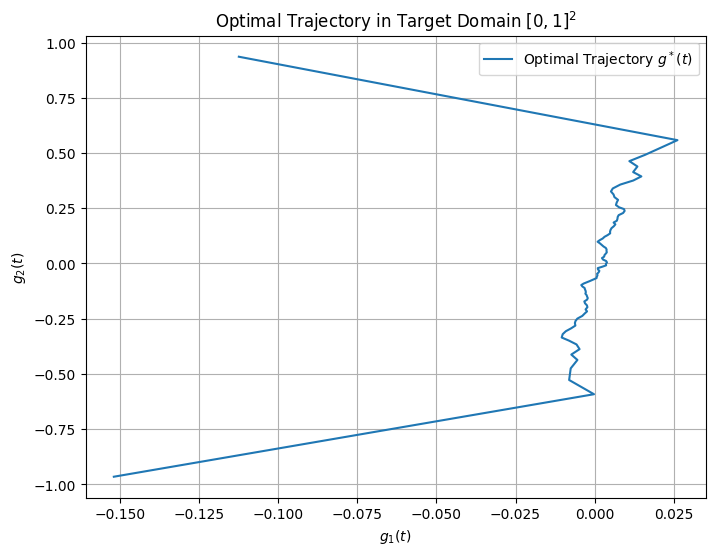

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to sample from the Gaussian distribution in d dimensions
def sample_from_gaussian(mu, sigma, size=1000):
    return np.random.multivariate_normal(mu, sigma, size)

# Function to compute the 1D marginal of a multivariate Gaussian along a given direction
def marginal_distribution(samples, theta):
    projections = samples @ theta  # Projections onto the direction theta
    return projections

# Function to generate random directions uniformly distributed on the unit sphere S^{d-1}
def generate_random_directions(d, num_directions):
    directions = np.random.randn(num_directions, d)  # Generate random samples from normal distribution
    directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]  # Normalize each direction
    return directions

# Define the minimum-norm solution for linear constraints
def min_norm_solution(A, b):
    return np.linalg.pinv(A) @ b

# Define the trajectory computation function
def compute_trajectory(directions, marginal_samples, target_domain):
    # Initialize the trajectory array in the target domain [0, 1]^2
    trajectory = np.zeros((len(target_domain), directions.shape[1]))  # Adjust shape to number of directions
    
    for i, t in enumerate(target_domain):
        # Ensure that the marginal samples for each direction are provided correctly
        b = np.array([marginal_samples[dir_idx](t) for dir_idx in range(len(directions))])  # b(t)
        
        # Compute the minimum-norm solution for the given target domain
        trajectory[i, :] = min_norm_solution(directions, b)  # Corrected here, no transpose needed
    return trajectory

# Set up the Gaussian parameters
mu = np.zeros(2)  # Mean of the distribution in 2D
sigma = np.eye(2)  # Identity covariance matrix for a standard 2D Gaussian

# Sample points from the 2D Gaussian distribution
num_samples = 5000
samples = sample_from_gaussian(mu, sigma, num_samples)

# Generate random directions from the unit sphere S^{d-1} (e.g., 5 random directions in 2D)
num_directions = 200
directions = generate_random_directions(2, num_directions)

# Define target domain as the unit square [0, 1]^2
target_domain = np.linspace(0, 1, num_samples)  # Uniformly sampled points in [0, 1]

# Compute the 1D marginals for each direction
def marginal_fn(direction, samples):
    def marginal(t):
        # Get the marginal distribution of the projection at t (just the mean for now)
        projections = marginal_distribution(samples, direction)
        return np.percentile(projections, int(t * 100))  # Return the t-th percentile
    return marginal

# Create marginal sample functions for each direction
marginal_samples = [marginal_fn(direction, samples) for direction in directions]

# Compute the trajectory
trajectory = compute_trajectory(directions, marginal_samples, target_domain)

# Plot the trajectory in the target domain [0, 1]^2
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], label="Optimal Trajectory $g^*(t)$")
plt.title("Optimal Trajectory in Target Domain $[0, 1]^2$")
plt.xlabel("$g_1(t)$")
plt.ylabel("$g_2(t)$")
plt.legend()
plt.grid(True)
plt.show()


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import interp1d
from numpy.linalg import pinv

# --- Setup: Simple 2D problem ---

# Directions: 4 directions (unit vectors in R^2)
thetas = [
    np.array([1.0, 0.0]),   # x-axis
    np.array([0.0, 1.0]),   # y-axis
    np.array([1.0, 1.0]) / np.sqrt(2),  # diagonal /
    np.array([1.0, -1.0]) / np.sqrt(2)  # diagonal \
]

# Target distribution: standard normal along each projection
# So projected marginals will also be standard normal

# Base distribution: uniform on [0, 1] (assumed for projections)
def F_nu(x): return x  # identity on [0, 1]

# F_mu: standard normal
def F_mu_inv(t): return norm.ppf(t)  # inverse CDF of standard normal
def dF_mu_inv_dt(t): return 1.0 / norm.pdf(norm.ppf(t))  # derivative via inverse function theorem

# Interpolation handles for projected inverse CDFs and their derivatives
t_grid = np.linspace(1e-4, 1 - 1e-4, 1000)
F_mu_inv_vals = F_mu_inv(t_grid)
dF_mu_inv_vals = dF_mu_inv_dt(t_grid)

F_mu_inv_func = interp1d(t_grid, F_mu_inv_vals, kind='linear', fill_value="extrapolate")
dF_mu_inv_dt_func = interp1d(t_grid, dF_mu_inv_vals, kind='linear', fill_value="extrapolate")

# Repeat the same for all thetas since marginals are same here
F_nu_funcs = [F_nu for _ in thetas]
F_mu_inv_funcs = [F_mu_inv_func for _ in thetas]
dF_mu_inv_dt_funcs = [dF_mu_inv_dt_func for _ in thetas]

# --- Velocity field function ---
def compute_u(x, thetas, F_mu_inv_funcs, F_nu_funcs, dF_mu_inv_dt_funcs):
    K = len(thetas)
    d = x.shape[0]

    A = np.stack(thetas)  # (K, d)
    b = np.zeros(K)

    for k, theta_k in enumerate(thetas):
        proj = np.dot(x, theta_k)
        t_proj = norm.cdf(proj)  # Base CDF: standard normal
        b[k] = dF_mu_inv_dt_funcs[k](t_proj)

    u = A.T @ pinv(A @ A.T) @ b
    return u

# --- Simulate trajectory ---

# Initial condition: uniform sample
np.random.seed(0)
x0 = np.random.uniform(-2, 2, size=(1,2))

# Time discretization
T = 1.0
N = 50
dt = T / N
trajectory = [x0.copy()]

x_t = x0.copy()
for i in range(N):
    u = np.array([compute_u(x, thetas, F_mu_inv_funcs, F_nu_funcs, dF_mu_inv_dt_funcs) for x in x_t])
    x_t = x_t + dt * u
    trajectory.append(x_t.copy())

trajectory = np.stack(trajectory)  # shape: (N+1, num_particles, 2)
trajectory.shape


(51, 1, 2)

In [64]:
print(trajectory.squeeze())

[[1.95254016e-01 8.60757465e-01]
 [2.64026141e-01 9.00687036e-01]
 [3.34477015e-01 9.43558261e-01]
 [4.07095989e-01 9.89896540e-01]
 [4.82494679e-01 1.04038667e+00]
 [5.61464500e-01 1.09594407e+00]
 [6.45070322e-01 1.15782992e+00]
 [7.34810163e-01 1.22784839e+00]
 [8.32912064e-01 1.30871342e+00]
 [9.42919618e-01 1.40476929e+00]
 [1.07102434e+00 1.52362199e+00]
 [1.22956237e+00 1.68038676e+00]
 [1.44887260e+00 1.91188769e+00]
 [1.83842149e+00 2.34834837e+00]
 [3.54383584e+00 4.27587476e+00]
 [4.60930513e+01 5.10114471e+01]
 [1.08493847e+02 8.25516825e+01]
 [1.74920187e+02 1.10066373e+02]
 [2.41346527e+02 1.37581064e+02]
 [3.07772867e+02 1.65095755e+02]
 [3.74199207e+02 1.92610446e+02]
 [4.40625546e+02 2.20125137e+02]
 [5.07051886e+02 2.47639828e+02]
 [5.73478226e+02 2.75154519e+02]
 [6.39904566e+02 3.02669210e+02]
 [7.06330906e+02 3.30183901e+02]
 [7.72757246e+02 3.57698592e+02]
 [8.39183586e+02 3.85213282e+02]
 [9.05609926e+02 4.12727973e+02]
 [9.72036266e+02 4.40242664e+02]
 [1.038462

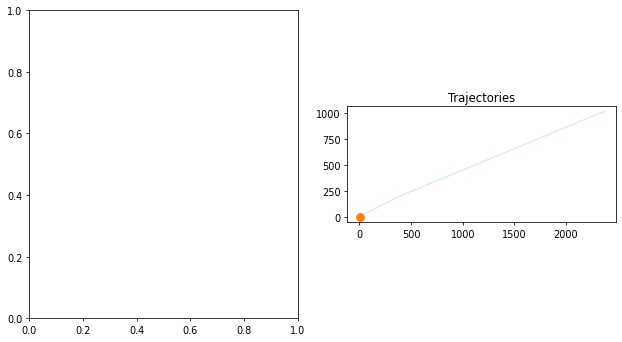

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(9,5), dpi=70, tight_layout=True)
ax = axes[1]
ax.set_title('Trajectories')
ax.set_aspect('equal')
ax.plot(trajectory[::10, 0, 0], trajectory[::10, 0, 1], linestyle='-', marker='', alpha=0.15, label=f'Trajectory {i}')
ax.plot(trajectory[0, 0, 0], trajectory[0, 0, 1], linestyle='', marker='o', markersize=8, alpha=1.0, label=f'Init {i}')
#ax.legend(loc=1)

Iteration 0, Loss: 3333.500016668334
Iteration 100, Loss: 3333.0001165254457
Iteration 200, Loss: 3332.500283018154
Iteration 300, Loss: 3332.0005161386844
Iteration 400, Loss: 3331.5008158792684
Iteration 500, Loss: 3331.0011822321353
Iteration 600, Loss: 3330.5016151895143
Iteration 700, Loss: 3330.0021147436373
Iteration 800, Loss: 3329.502680886738
Iteration 900, Loss: 3329.003313611048


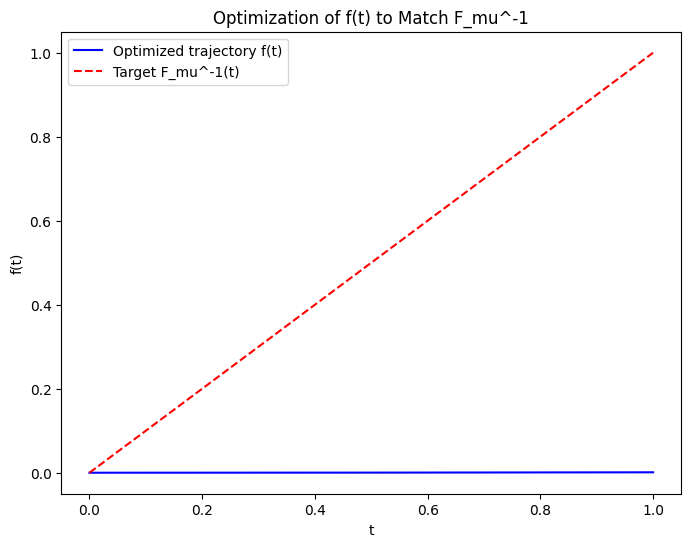

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Target: F_mu^-1 (inverse CDF of the target distribution)
def F_mu_inv(t):
    return t  # In the simplest case, assume uniform distribution

# First-order dynamics update
def update_f(f_prev, u_prev, dt):
    return f_prev + u_prev * dt

# Loss function to minimize
def loss(f, F_mu_inv_vals):
    return np.sum((f - F_mu_inv_vals)**2)

# Gradient of the loss with respect to u(t)
def compute_gradients(f, F_mu_inv_vals, u, dt):
    grad_u = 2 * (f - F_mu_inv_vals) * dt
    return grad_u

# Optimization via gradient descent
def optimize_trajectory(T, N_steps, F_mu_inv, learning_rate=0.01, max_iter=1000):
    # Time discretization
    dt = T / N_steps
    t_values = np.linspace(0, T, N_steps)
    
    # Initialize f(t) and control input u(t)
    f = np.zeros(N_steps)  # Start with zero trajectory
    u = np.zeros(N_steps)  # Initial control input
    
    # Compute target values for F_mu_inv
    F_mu_inv_vals = F_mu_inv(t_values)
    
    # Iteratively update the trajectory
    for iter in range(max_iter):
        # Update f(t) using the current control input u(t)
        for i in range(1, N_steps):
            f[i] = update_f(f[i-1], u[i-1], dt)
        
        # Compute gradients (simple gradient descent)
        grad_u = compute_gradients(f, F_mu_inv_vals, u, dt)
        
        # Update control input u using the gradient
        u -= learning_rate * grad_u
        
        # Print the loss every 100 iterations
        if iter % 100 == 0:
            current_loss = loss(f, F_mu_inv_vals)
            print(f"Iteration {iter}, Loss: {current_loss}")
        
        # Convergence check
        if np.linalg.norm(grad_u) < 1e-6:
            print(f"Converged after {iter} iterations.")
            break
    
    return f, t_values

# Run the optimization
T = 1  # Total time interval
N_steps = 10000  # Number of time steps
f_optimized, t_values = optimize_trajectory(T, N_steps, F_mu_inv)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_values, f_optimized, label='Optimized trajectory f(t)', color='b')
plt.plot(t_values, F_mu_inv(t_values), label='Target F_mu^-1(t)', color='r', linestyle='--')
plt.title('Optimization of f(t) to Match F_mu^-1')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()
